In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

## Fixed parameters

In [2]:
#####################################################
#
# Cosmological parameters, which I fixed
#
#####################################################

# temperature of CMB
T_cmb = 2.726  # [K]

# default value of Neff
Neff_def = 3.044  # [dimensionless]

# abaundance of the photons nowadays
Omega_gamma_present = 5.382098597277496e-05

# abaundace of axions nowadays
Y_a = 0.0122
g_star = 106.75
Omega_a_present = ((2 * np.pi**4 * g_star * Y_a) / (45 * 1.202))**(4/3) * 0.5 * Omega_gamma_present

#####################################################
#
# Axion parameters, which I fixed
#
#####################################################

# mass of axion
m_ncdm_in_eV = 0.6  # [eV]

# temperature of axion, nowadays
T_ncdm = 0.331070  # [T_CMB]
# T_ncdm = 0.731070  # [T_CMB]
T_ncdm_K = T_ncdm * T_cmb  # [K]

In [3]:
#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm': 0.1201075,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.2454,
                   # Background parameters
                   'T_cmb': T_cmb,
                   # Axion parameters
                   'N_ncdm': 1,
                   'm_ncdm': m_ncdm_in_eV,
                   'T_ncdm': T_ncdm,
                   'Omega_ncdm': Omega_a_present
                   }

## Running CLASS

In [15]:
############################################
#
# Varying parameter (others fixed to default)
# The varying parameter will be:
# Omega_ncdm
#
############################################

AxionClass = Class()
AxionClass.set(common_settings)
AxionClass.compute()
# load background table
baAxionClass = AxionClass.get_background()
thAxion=AxionClass.get_thermodynamics()

In [24]:
arr_z = baAxionClass['z']
arr_rho_a = baAxionClass['(.)rho_ncdm[0]']
arr_rho_g = baAxionClass['(.)rho_g']
arr_rho_tot = baAxionClass['(.)rho_tot']

arr_a_thermo = thAxion['scale factor a']
arr_z_thermo = thAxion['z']

print(arr_rho_a)
print(arr_rho_g)

[3.78506490e+41 3.77288263e+41 3.76073957e+41 ... 1.08631243e-11
 1.08368914e-11 1.08107219e-11]
[2.75358021e+44 2.74471779e+44 2.73588389e+44 ... 2.77139100e-12
 2.76247125e-12 2.75358021e-12]


In [7]:
def cal_Y_a(_rho_a, _rho_g):
    return (2 * _rho_a / _rho_g)**(3/4) * (45 * 1.202) / (2 * (np.pi)**4 * g_star)

In [8]:
arr_Y_a = np.array([])

for i in range(0, len(arr_z)):
    rho_a = arr_rho_a[i]
    rho_g = arr_rho_g[i]
    
    Y_a = cal_Y_a(rho_a, rho_g)
    # append
    arr_Y_a = np.append(arr_Y_a, Y_a)

In [9]:
print(arr_Y_a)

[3.12265357e-05 3.12265357e-05 3.12265357e-05 ... 1.21852605e-02
 1.21926280e-02 1.22000000e-02]


## Plotting

In [11]:
font = {'size'   : 14, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
# matplotlib.mathtext.rcParams['legend.fontsize']='medium'

Text(0, 0.5, '$Y_{\\mathrm{a}}$')

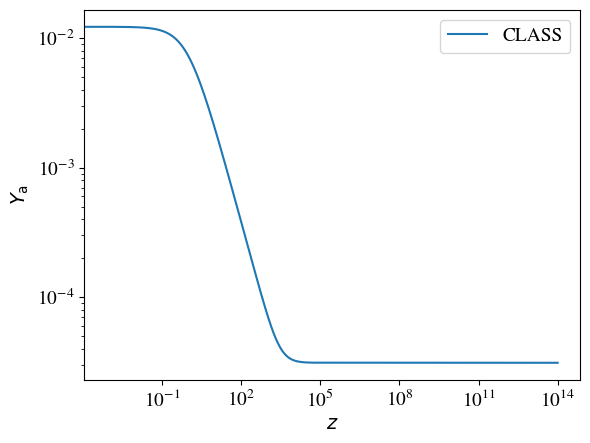

In [17]:
plt.loglog(arr_z, arr_Y_a, label='CLASS')

# legend
plt.legend(loc='upper right')
# Describtion
plt.xlabel(r"$z$")
plt.ylabel(r"$Y_{\mathrm{a}}$")
# plt.tight_layout()

Text(0, 0.5, '$a$')

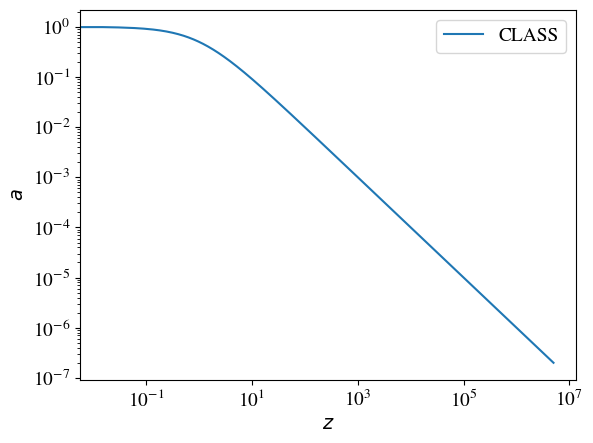

In [25]:
plt.loglog(arr_z_thermo, arr_a_thermo, label='CLASS')

# legend
plt.legend(loc='upper right')
# Describtion
plt.xlabel(r"$z$")
plt.ylabel(r"$a$")
# plt.tight_layout()

Text(0, 0.5, '$\\rho_{\\mathrm{tot}}$')

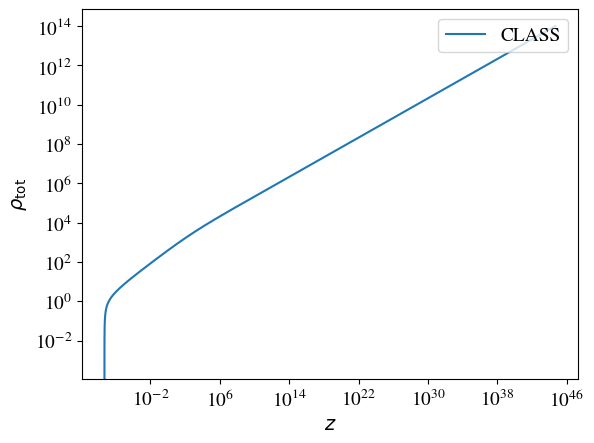

In [29]:
plt.loglog(arr_rho_tot, arr_z, label='CLASS')

# legend
plt.legend(loc='upper right')
# Describtion
plt.xlabel(r"$z$")
plt.ylabel(r"$\rho_{\mathrm{tot}}$")
# plt.tight_layout()